In [1]:
import numpy as np
import pandas as pd
import xpress as xp


## 1. Data Exploration

In [2]:
# read-data
TransactionsInput = pd.read_excel("231013_Transactions_Input.xlsx")

In [3]:
FuardCases = pd.read_excel("231013_Fraud_Cases.xlsx")
CustomerBase = pd.read_excel("231013_Customer_Base.xlsx")

In [4]:
TransactionsInput["description"].nunique()

347

In [5]:
TransactionsInput

transaction_id                             description       Amount  \
0                    1        Salary Deposit - XYZ Corporation  11474.33021   
1                    2  Online Retailer - Electronics Purchase    199.99000   
2                    3    Utilities Payment - Internet Service     60.00000   
3                    4                            Rent Payment   1500.00000   
4                    5         Paycheck Deposit - Company Name  10480.68449   
...                ...                                     ...          ...   
315177          315178     Grocery Shopping - Super Value Mart     55.25000   
315178          315179             JCPenney - Discount Fashion     40.00000   
315179          315180             Gas Station - Fuel Purchase     40.45000   
315180          315181           ATM Withdrawal - PQR Bank ATM     80.00000   
315181          315182             Gas Station - Fuel Purchase     40.45000   

               category       date    month  customer_id      type In_or_Out  \
0                Income 2023-10-01  October        17699    income   paid_in   
1       Online Shopping 2023-10-01  October        10298  spending  paid_out   
2             Utilities 2023-10-01  October        10298  spending  paid_out   
3               Housing 2023-10-01  October        14507  spending  paid_out   
4                Income 2023-10-01  October        14507    income   paid_in   
...                 ...        ...      ...          ...       ...       ...   
315177        Groceries 2024-07-31     July        15026  spending  paid_out   
315178         Shopping 2024-07-31     July        11908  spending  paid_out   
315179   Transportation 2024-07-31     July        10291  spending  paid_out   
315180  Cash Withdrawal 2024-07-31     July        18543  spending  paid_out   
315181   Transportation 2024-07-31     July        13560  spending  paid_out   

       bank_to bank_from  transac_prob  description_prob  priority  
0       bank_A    bank_A           NaN               NaN         3  
1       bank_A    bank_E          0.78              0.25         3  
2       bank_C    bank_E          0.30              0.22         1  
3       bank_D    bank_E          0.57              0.53         3  
4       bank_E    bank_D           NaN               NaN         3  
...        ...       ...           ...               ...       ...  
315177  bank_C    bank_B          0.42              0.17         1  
315178  bank_D    bank_A          0.36              0.36         1  
315179  bank_D    bank_D          0.28              0.64         1  
315180     NaN    bank_A          0.24              0.23         2  
315181  bank_A    bank_D          0.16              0.54         1  

[315182 rows x 14 columns]

In [6]:
CustomerBase

customer_id home_bank  customer_prob
0          10298    bank_E           0.49
1          14507    bank_E           0.35
2          14558    bank_E           0.45
3          13453    bank_E           0.63
4          19629    bank_D           0.79
..           ...       ...            ...
480        15364    bank_E           0.42
481        13462    bank_A           0.53
482        18020    bank_E           0.38
483        16643    bank_B           0.26
484        16817    bank_C           0.26

[485 rows x 3 columns]

In [7]:
# TransactionsInput_clean = TransactionsInput.drop('description_prob', axis=1)
# TransactionsInput_clean = TransactionsInput.drop(TransactionsInput[TransactionsInput['In_or_Out'] == 'paid_in'].index)


In [8]:
FuardCases

transaction_id  is_scam_transaction     fraud_type  case_id
0                187                    1     AdvanceFee  5415844
1                247                    1  Impersonation  4280670
2                818                    1  Impersonation  6956462
3                891                    1       Purchase  2702984
4               1142                    1       Purchase  3493741
...              ...                  ...            ...      ...
2476          313591                    1  Impersonation  5711663
2477          314245                    1     AdvanceFee  8032096
2478          314259                    1       Purchase  1154155
2479          314411                    1     AdvanceFee  4460117
2480          314742                    1     Investment  5722734

[2481 rows x 4 columns]

### Find the seasonality

In [9]:
Fuard_time = pd.merge(TransactionsInput,FuardCases, on="transaction_id")[["date","month"]]
Fuard_time['month'] = Fuard_time.apply(lambda row: row['month'] + str(row['date'].year), axis=1)
unique_date, counts_date = np.unique(Fuard_time[['date']], return_counts=True)
unique_month, counts_month = np.unique(Fuard_time[['month']], return_counts=True)
frequency_date = dict(zip(unique_date, counts_date))
frequency_month = dict(zip(unique_month, counts_month))  
print(frequency_date)
print(frequency_month)

{numpy.datetime64('2023-10-01T00:00:00.000000000'): 18, numpy.datetime64('2023-10-02T00:00:00.000000000'): 6, numpy.datetime64('2023-10-03T00:00:00.000000000'): 20, numpy.datetime64('2023-10-04T00:00:00.000000000'): 7, numpy.datetime64('2023-10-05T00:00:00.000000000'): 8, numpy.datetime64('2023-10-06T00:00:00.000000000'): 8, numpy.datetime64('2023-10-07T00:00:00.000000000'): 4, numpy.datetime64('2023-10-08T00:00:00.000000000'): 8, numpy.datetime64('2023-10-09T00:00:00.000000000'): 9, numpy.datetime64('2023-10-10T00:00:00.000000000'): 6, numpy.datetime64('2023-10-11T00:00:00.000000000'): 5, numpy.datetime64('2023-10-12T00:00:00.000000000'): 13, numpy.datetime64('2023-10-13T00:00:00.000000000'): 7, numpy.datetime64('2023-10-14T00:00:00.000000000'): 8, numpy.datetime64('2023-10-15T00:00:00.000000000'): 9, numpy.datetime64('2023-10-16T00:00:00.000000000'): 6, numpy.datetime64('2023-10-17T00:00:00.000000000'): 6, numpy.datetime64('2023-10-18T00:00:00.000000000'): 8, numpy.datetime64('2023-1

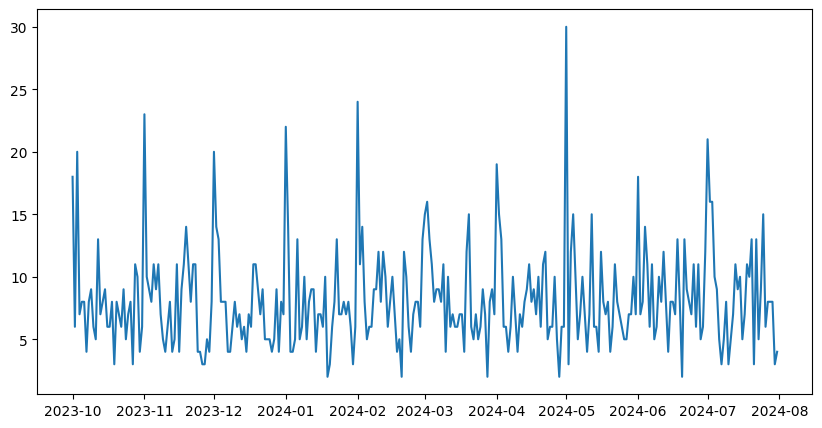

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(unique_date,counts_date)

In [11]:
# in proportion
TransactionsInput['if_fraud'] = TransactionsInput['transaction_id'].apply(lambda x: 1 if x in FuardCases['transaction_id'].values else 0)
TransactionsInput_ratio = TransactionsInput[["date","if_fraud"]]


In [12]:
label_ratio = TransactionsInput_ratio.groupby('date')['if_fraud'].mean()
label_ratio

date
2023-10-01    0.007453
2023-10-02    0.004386
2023-10-03    0.014524
2023-10-04    0.006162
2023-10-05    0.008584
                ...   
2024-07-27    0.008621
2024-07-28    0.008547
2024-07-29    0.009313
2024-07-30    0.003036
2024-07-31    0.004264
Name: if_fraud, Length: 305, dtype: float64

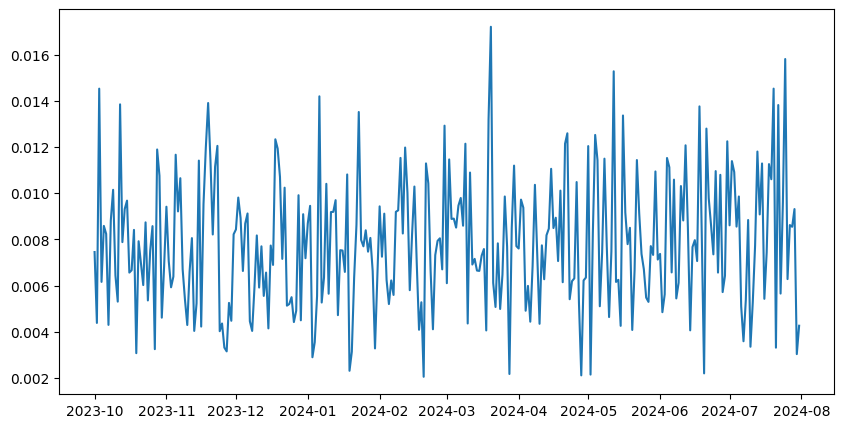

In [13]:
plt.figure(figsize=(10,5))
plt.plot(unique_date,label_ratio)

In [14]:
# TransactionsInput_clean = TransactionsInput_clean[["In_or_Out"] == "paid_in"]

## 2. Create a problem with xpress module

#### 2.1 The basic model in a single day. (Ignore the learn model)

In [15]:
# prepare data
# https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandaabss/
TransactionsInput_label_id = np.array(FuardCases["transaction_id"])
TransactionsInput = TransactionsInput
TransactionsInput["is_fraud"] = 0
TransactionsInput["is_fraud"].loc[TransactionsInput_label_id-1] = 1

TransactionsInput_clean = TransactionsInput.drop(TransactionsInput[TransactionsInput['In_or_Out'] == 'paid_in'].index)
TransactionsInput_clean = TransactionsInput_clean.drop(TransactionsInput[TransactionsInput['category'] == 'Cash Withdrawal'].index)

TransactionsInput_clean = pd.merge(TransactionsInput_clean, CustomerBase, on='customer_id', how='left')

# investigation time dataframe
Inestigation_time = pd.DataFrame(data={'priority':[1, 2, 3, 4], 'investigation_time':[0.25, 0.5, 1, 2]}, index=([0, 1, 2, 3]))

# merge inverstigation time with the input data
TransactionsInput_clean = pd.merge(TransactionsInput_clean, Inestigation_time, on='priority', how='left')

# investigation  dataframe
Inestigation_hire = pd.DataFrame(data={'priority':[1, 2, 3, 4], 'investigation_hire':[40, 60, 100, 150]}, index=([0, 1, 2, 3]))

# merge inverstigation time with the input data
TransactionsInput_clean = pd.merge(TransactionsInput_clean, Inestigation_hire, on='priority', how='left')

C:\Users\Eliza\AppData\Local\Temp\ipykernel_33936\1887454724.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TransactionsInput["is_fraud"].loc[TransactionsInput_label_id-1] = 1


In [16]:
TransactionsInput_clean

transaction_id                             description   Amount  \
0                    2  Online Retailer - Electronics Purchase   199.99   
1                    3    Utilities Payment - Internet Service    60.00   
2                    4                            Rent Payment  1500.00   
3                    6  Online Retailer - Electronics Purchase   299.99   
4                    7          Asos - Online Fashion Shopping    55.00   
...                ...                                     ...      ...   
238152          315177   Home Improvement Store - DIY Supplies    75.40   
238153          315178     Grocery Shopping - Super Value Mart    55.25   
238154          315179             JCPenney - Discount Fashion    40.00   
238155          315180             Gas Station - Fuel Purchase    40.45   
238156          315182             Gas Station - Fuel Purchase    40.45   

                category       date    month  customer_id      type In_or_Out  \
0        Online Shopping 2023-10-01  October        10298  spending  paid_out   
1              Utilities 2023-10-01  October        10298  spending  paid_out   
2                Housing 2023-10-01  October        14507  spending  paid_out   
3        Online Shopping 2023-10-01  October        14507  spending  paid_out   
4               Shopping 2023-10-01  October        14507  spending  paid_out   
...                  ...        ...      ...          ...       ...       ...   
238152  Home Improvement 2024-07-31     July        11908  spending  paid_out   
238153         Groceries 2024-07-31     July        15026  spending  paid_out   
238154          Shopping 2024-07-31     July        11908  spending  paid_out   
238155    Transportation 2024-07-31     July        10291  spending  paid_out   
238156    Transportation 2024-07-31     July        13560  spending  paid_out   

       bank_to bank_from  transac_prob  description_prob  priority  if_fraud  \
0       bank_A    bank_E          0.78              0.25         3         0   
1       bank_C    bank_E          0.30              0.22         1         0   
2       bank_D    bank_E          0.57              0.53         3         0   
3       bank_E    bank_E          0.75              0.65         3         0   
4       bank_B    bank_E          0.37              0.31         1         0   
...        ...       ...           ...               ...       ...       ...   
238152  bank_D    bank_A          0.35              0.63         1         0   
238153  bank_C    bank_B          0.42              0.17         1         0   
238154  bank_D    bank_A          0.36              0.36         1         0   
238155  bank_D    bank_D          0.28              0.64         1         0   
238156  bank_A    bank_D          0.16              0.54         1         0   

        is_fraud home_bank  customer_prob  investigation_time  \
0              0    bank_E           0.49                1.00   
1              0    bank_E           0.49                0.25   
2              0    bank_E           0.35                1.00   
3              0    bank_E           0.35                1.00   
4              0    bank_E           0.35                0.25   
...          ...       ...            ...                 ...   
238152         0    bank_A           0.32                0.25   
238153         0    bank_B           0.52                0.25   
238154         0    bank_A           0.32                0.25   
238155         0    bank_D           0.35                0.25   
238156         0    bank_D           0.20                0.25   

        investigation_hire  
0                      100  
1                       40  
2                      100  
3                      100  
4                       40  
...                    ...  
238152                  40  
238153                  40  
238154                  40  
238155                  40  
238156                  40  

[238157 rows x 20 columns]

In [17]:
date_list = pd.to_datetime(TransactionsInput_clean['date']).dt.date
# date_list.unique()
formatted_dates = date_list.apply(lambda date: date.strftime('%Y-%m-%d'))
date_list = formatted_dates.unique()

date = date_list[0]
TransactionsInput_clean[TransactionsInput_clean['date'] == date]

transaction_id                                       description  \
0                  2            Online Retailer - Electronics Purchase   
1                  3              Utilities Payment - Internet Service   
2                  4                                      Rent Payment   
3                  6            Online Retailer - Electronics Purchase   
4                  7                    Asos - Online Fashion Shopping   
...              ...                                               ...   
1699            2410  Credit Card Payment - American Express **** 5678   
1700            2412             Home Improvement - Paint and Supplies   
1701            2413                                      Rent Payment   
1702            2414        Credit Card Payment - Mastercard **** 6789   
1703            2415          Internet Service Payment - Provider Name   

       Amount             category       date    month  customer_id      type  \
0      199.99      Online Shopping 2023-10-01  October        10298  spending   
1       60.00            Utilities 2023-10-01  October        10298  spending   
2     1500.00              Housing 2023-10-01  October        14507  spending   
3      299.99      Online Shopping 2023-10-01  October        14507  spending   
4       55.00             Shopping 2023-10-01  October        14507  spending   
...       ...                  ...        ...      ...          ...       ...   
1699   175.00  Credit Card Payment 2023-10-01  October        17647  spending   
1700   110.75     Home Improvement 2023-10-01  October        17031  spending   
1701  1200.00              Housing 2023-10-01  October        17699  spending   
1702   150.50  Credit Card Payment 2023-10-01  October        17390  spending   
1703    70.00            Utilities 2023-10-01  October        13462  spending   

     In_or_Out bank_to bank_from  transac_prob  description_prob  priority  \
0     paid_out  bank_A    bank_E          0.78              0.25         3   
1     paid_out  bank_C    bank_E          0.30              0.22         1   
2     paid_out  bank_D    bank_E          0.57              0.53         3   
3     paid_out  bank_E    bank_E          0.75              0.65         3   
4     paid_out  bank_B    bank_E          0.37              0.31         1   
...        ...     ...       ...           ...               ...       ...   
1699  paid_out  Intrnl    bank_D          0.66              0.36         4   
1700  paid_out  bank_E    bank_A          0.43              0.46         2   
1701  paid_out  bank_D    bank_A          0.64              0.38         3   
1702  paid_out  Intrnl    bank_D          0.66              0.68         4   
1703  paid_out  bank_C    bank_A          0.33              0.45         1   

      if_fraud  is_fraud home_bank  customer_prob  investigation_time  \
0            0         0    bank_E           0.49                1.00   
1            0         0    bank_E           0.49                0.25   
2            0         0    bank_E           0.35                1.00   
3            0         0    bank_E           0.35                1.00   
4            0         0    bank_E           0.35                0.25   
...        ...       ...       ...            ...                 ...   
1699         0         0    bank_D           0.70                2.00   
1700         0         0    bank_A           0.58                0.50   
1701         0         0    bank_A           0.66                1.00   
1702         0         0    bank_D           0.45                2.00   
1703         0         0    bank_A           0.53                0.25   

      investigation_hire  
0                    100  
1                     40  
2                    100  
3                    100  
4                     40  
...                  ...  
1699                 150  
1700                  60  
1701                 100  
1702                 150  
1703                  40  

[1704

### 2.2 Abstract the test set for testing the code - only use first 10 transactios

In [18]:

TransactionsInput_clean_test = TransactionsInput_clean[0:10]
TransactionsInput_clean_test


transaction_id                             description   Amount  \
0               2  Online Retailer - Electronics Purchase   199.99   
1               3    Utilities Payment - Internet Service    60.00   
2               4                            Rent Payment  1500.00   
3               6  Online Retailer - Electronics Purchase   299.99   
4               7          Asos - Online Fashion Shopping    55.00   
5               9             Fuel Purchase - Gas Station    42.75   
6              10             Fuel Purchase - Gas Station    45.60   
7              11  Phone Bill Payment - Wireless Provider    70.00   
8              12         Phone Bill Payment - Mobile Co.    65.00   
9              13                            Rent Payment  1500.00   

          category       date    month  customer_id      type In_or_Out  \
0  Online Shopping 2023-10-01  October        10298  spending  paid_out   
1        Utilities 2023-10-01  October        10298  spending  paid_out   
2          Housing 2023-10-01  October        14507  spending  paid_out   
3  Online Shopping 2023-10-01  October        14507  spending  paid_out   
4         Shopping 2023-10-01  October        14507  spending  paid_out   
5   Transportation 2023-10-01  October        14507  spending  paid_out   
6   Transportation 2023-10-01  October        14507  spending  paid_out   
7        Utilities 2023-10-01  October        14507  spending  paid_out   
8        Utilities 2023-10-01  October        14558  spending  paid_out   
9          Housing 2023-10-01  October        14558  spending  paid_out   

  bank_to bank_from  transac_prob  description_prob  priority  if_fraud  \
0  bank_A    bank_E          0.78              0.25         3         0   
1  bank_C    bank_E          0.30              0.22         1         0   
2  bank_D    bank_E          0.57              0.53         3         0   
3  bank_E    bank_E          0.75              0.65         3         0   
4  bank_B    bank_E          0.37              0.31         1         0   
5  bank_E    bank_E          0.39              0.44         1         0   
6  bank_A    bank_E          0.24              0.21         1         0   
7  bank_A    bank_E          0.38              0.16         1         0   
8  bank_A    bank_E          0.57              0.30         1         0   
9  bank_C    bank_E          0.63              0.41         3         0   

   is_fraud home_bank  customer_prob  investigation_time  investigation_hire  
0         0    bank_E           0.49                1.00                 100  
1         0    bank_E           0.49                0.25                  40  
2         0    bank_E           0.35                1.00                 100  
3         0    bank_E           0.35                1.00                 100  
4         0    bank_E           0.35                0.25                  40  
5         0    bank_E           0.35                0.25                  40  
6         0    bank_E           0.35                0.25                  40  
7         0    bank_E           0.35                0.25                  40  
8         0    bank_E           0.45                0.25                  40  
9         0    bank_E           0.45                1.00                 100

### 2.3 Prepare the data

In [19]:
# # data (parameeters) needed in this problem
# # NOTE THAT: very strightforward way in this case as this is the idea stage.
# # still need to abstract the single instead of a whole data set
# x_length = len(TransactionsInput_clean_test["transaction_id"])
# y_length = len(TransactionsInput_clean_test["transaction_id"])
# Prob_transac = TransactionsInput_clean_test["transac_prob"]
# # Prob_description = TransactionsInput_clean_test["description_prob"]  

# Customer_test = pd.merge(TransactionsInput_clean_test, CustomerBase, on="customer_id", how="left")[['transaction_id','customer_id','home_bank','customer_prob']]
# Prob_customer = Customer_test["customer_prob"]

# # bank here is used to distribute the investigation resiponsibility
# B = ["bank_A","bank_B","bank_C","bank_D","bank_E"]
# Bank_to = TransactionsInput_clean_test["bank_to"]
# Bank_from = TransactionsInput_clean_test["bank_from"]

# # Parameters
# Bank = ["A", "B", "C", "D", "E"]
Investigarion_team = [8, 12, 10, 10, 10]

# Priority = TransactionsInput_clean_test["priority"]
# # Investigation_time_dict = {1:0.25, 2:0.5, 3:1, 4:2} 
# # Investigation_hire_exter_dict = {1:40, 2:60, 3:100, 4:150} 
# # Investigation_target_success = {1:0.5, 2:0.6, 3:0.7, 4:0.8}


In [20]:
# one-hot encoding
# decide which bank will join the investigation
B = ["bank_A","bank_B","bank_C","bank_D","bank_E"]
Bank_to = TransactionsInput_clean_test["bank_to"]
Bank_from = TransactionsInput_clean_test["bank_from"]

Bank_to_onehot = pd.get_dummies(Bank_to, dtype=int)
Bank_from_onehot = pd.get_dummies(Bank_from, dtype=int)
array_1 = Bank_to_onehot+Bank_from_onehot
array_2 = Bank_to_onehot+Bank_from_onehot

# find p4 row
p4 = TransactionsInput_clean_test[TransactionsInput_clean_test["priority"] == 4].index
array_1.loc[p4] = 0

# construct the constraints to pirority 4
not_p4 = TransactionsInput_clean_test.index.difference(p4)
array_2.loc[not_p4] = 0



### 2.4 Define the daily model function

#### 2.4.1 Daily Model with Alpha is the number of hiring external investgator

In [21]:
def daily_moel(alpha, beta_trans, beta_customer, TransactionsInput_clean_test, C4_cont,inve_team_size):
    # Create a problem called transaction
    prob = xp.problem(name='transaction_daily') 

    # declaration
    number_of_transactions = len(TransactionsInput_clean_test)
    # number_of_priorities = 4
    number_of_banks = 5
    transactions = range(number_of_transactions)
    # priorities = range(number_of_priorities)
    banks = range(number_of_banks)

    # prepare the data
    # decide which bank will join the investigation
    Bank_to = TransactionsInput_clean_test["bank_to"]
    Bank_from = TransactionsInput_clean_test["bank_from"]
    Bank_to_onehot = pd.get_dummies(Bank_to, dtype=int)
    Bank_to_onehot = Bank_to_onehot.drop('Intrnl', axis=1)
    Bank_from_onehot = pd.get_dummies(Bank_from, dtype=int)
    # bank_names = np.array(['bank_A', 'bank_B', 'bank_C', 'bank_D', 'bank_E'])
    # Bank_to_onehot = np.array([1 if TransactionsInput_clean_test.iloc[i, 9] == bank_names[b] else 0 
    #                     for b in banks for i in transactions]).reshape(number_of_banks, number_of_transactions)
    # Bank_from_onehot = np.array([1 if TransactionsInput_clean_test.iloc[i, 10] == bank_names[b] else 0 
    #                     for b in banks for i in transactions]).reshape(number_of_banks, number_of_transactions)
    array_1 = np.add(Bank_to_onehot, Bank_from_onehot)
    array_2 = np.add(Bank_to_onehot, Bank_from_onehot)

    # find p4 row
    p4 = TransactionsInput_clean_test[TransactionsInput_clean_test["priority"] == 4].index
    array_1.loc[p4] = 0
    trans_array_1 = array_1.T
    # trans_array_1 = np.array(trans_array_1)
    trans_array_1 = np.nan_to_num(trans_array_1)

    # find not p4 row
    not_p4 = TransactionsInput_clean_test.index.difference(p4)
    array_2.loc[not_p4] = 0
    trans_array_2 = array_2.T
    # trans_array_2 = np.array(trans_array_2)
    trans_array_2 = np.nan_to_num(trans_array_2)

    # investigation time and hire cose
    Investigation_time = np.array(TransactionsInput_clean_test["investigation_time"])
    Investigation_hire = np.array(TransactionsInput_clean_test["investigation_hire"])

    # value
    value =np.array(TransactionsInput_clean_test["Amount"])

    # prbability
    TP = np.array(TransactionsInput_clean_test["transac_prob"])
    TP = np.nan_to_num(TP)
    CP = np.array(TransactionsInput_clean_test["customer_prob"])
    CP = np.nan_to_num(CP)

    # add variables
    X = np.array([xp.var(vartype=xp.binary, name='X_{0}_{1}'.format(b+1, i+1)) 
                    for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    X4 = np.array([xp.var(vartype=xp.binary, name='X4_{0}_{1}'.format(b+1, i+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z = np.array([xp.var(vartype=xp.binary, name='Z_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z4 = np.array([xp.var(vartype=xp.binary, name='Z4_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    C = np.array([xp.var(vartype=xp.integer, name='C_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )
    C4 = np.array([xp.var(vartype=xp.integer, name='C4_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )

    prob.addVariable(X, X4, Z, Z4, C, C4)

    # set constraints
    prob.addConstraint(X[b,i] + X4[b,i] + Z[b,i] + Z4[b,i] <= 1 for i in transactions for b in banks)

    prob.addConstraint(xp.Sum(X[b,i] * Investigation_time[i] for i in transactions) <= C[b] for b in banks)
    prob.addConstraint(xp.Sum(X4[b,i] * Investigation_time[i] for i in transactions ) <= C4[b] for b in banks)

    prob.addConstraint((C[n] + C4[n] + C4_cont[n]) <= inve_team_size[n] for n in banks)

    prob.addConstraint(X[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(X4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)

    prob.addConstraint(xp.Sum(Z[n] + Z4[n] for n in banks) <= alpha)

    # set objective function
    prob.setObjective(xp.Sum(value[i]*(beta_trans*TP[i] + beta_customer*CP[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
                  + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks),
                    sense=xp.minimize)

    # get solution
    prob.solve()

    x_optimal = prob.getSolution(X)
    x_4_optimal = prob.getSolution(X4)
    Ex_hire_optimal = prob.getSolution(Z)
    Ex_hire_4_optimal = prob.getSolution(Z4)
    C4_cont = prob.getSolution(C4)

    cost = prob.getObjVal()
    
    
    return x_optimal, x_4_optimal, Ex_hire_optimal, Ex_hire_4_optimal, cost, C4_cont 
    # return 


#### 2.4.2 Threadhold daily model

In [22]:
def daily_threadhold_moel(alpha, beta_trans, beta_customer, TransactionsInput_clean_test, C4_cont,inve_team_size):
    # Create a problem called transaction
    prob = xp.problem(name='transaction_daily') 

    # declaration
    number_of_transactions = len(TransactionsInput_clean_test)
    # number_of_priorities = 4
    number_of_banks = 5
    transactions = range(number_of_transactions)
    # priorities = range(number_of_priorities)
    banks = range(number_of_banks)

    # prepare the data
    # decide which bank will join the investigation
    Bank_to = TransactionsInput_clean_test["bank_to"]
    Bank_from = TransactionsInput_clean_test["bank_from"]
    Bank_to_onehot = pd.get_dummies(Bank_to, dtype=int)
    Bank_from_onehot = pd.get_dummies(Bank_from, dtype=int)
    array_1 = np.add(Bank_to_onehot, Bank_from_onehot)
    array_2 = np.add(Bank_to_onehot, Bank_from_onehot)

    # find p4 row
    p4 = TransactionsInput_clean_test[TransactionsInput_clean_test["priority"] == 4].index
    array_1.loc[p4] = 0
    trans_array_1 = array_1.T
    # trans_array_1 = np.array(trans_array_1)
    trans_array_1 = np.nan_to_num(trans_array_1)

    # find not p4 row
    not_p4 = TransactionsInput_clean_test.index.difference(p4)
    array_2.loc[not_p4] = 0
    trans_array_2 = array_2.T
    # trans_array_2 = np.array(trans_array_2)
    trans_array_2 = np.nan_to_num(trans_array_2)

    # investigation time and hire cose
    Investigation_time = np.array(TransactionsInput_clean_test["investigation_time"])
    Investigation_hire = np.array(TransactionsInput_clean_test["investigation_hire"])

    # value
    value =np.array(TransactionsInput_clean_test["Amount"])

    # prbability
    TP = np.array(TransactionsInput_clean_test["transac_prob"])
    TP = np.nan_to_num(TP)
    CP = np.array(TransactionsInput_clean_test["customer_prob"])
    CP = np.nan_to_num(CP)
    total_prob = TP + CP

    # add variables
    X = np.array([xp.var(vartype=xp.binary, name='X_{0}_{1}'.format(b+1, i+1)) 
                    for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    X4 = np.array([xp.var(vartype=xp.binary, name='X4_{0}_{1}'.format(b+1, i+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z = np.array([xp.var(vartype=xp.binary, name='Z_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z4 = np.array([xp.var(vartype=xp.binary, name='Z4_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    C = np.array([xp.var(vartype=xp.integer, name='C_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )
    C4 = np.array([xp.var(vartype=xp.integer, name='C4_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )

    prob.addVariable(X, X4, Z, Z4, C, C4)

    # set constraints
    prob.addConstraint(X[b,i] + X4[b,i] + Z[b,i] + Z4[b,i] <= 1 for i in transactions for b in banks)

    prob.addConstraint(xp.Sum(X[b,i] * Investigation_time[i] for i in transactions) <= C[b] for b in banks)
    prob.addConstraint(xp.Sum(X4[b,i] * Investigation_time[i] for i in transactions ) <= C4[b] for b in banks)

    prob.addConstraint((C[n] + C4[n] + C4_cont[n]) <= inve_team_size[n] for n in banks)

    prob.addConstraint(X[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(X4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)

    prob.addConstraint(X[b,i] <= 0 for i in transactions for b in banks if total_prob[i] <= 0.5)
    prob.addConstraint(Z[b,i] <= 0 for i in transactions for b in banks if total_prob[i] <= 0.5)
    prob.addConstraint(X4[b,i] <= 0 for i in transactions for b in banks if total_prob[i] <= 0.5)
    prob.addConstraint(Z4[b,i] <= 0 for i in transactions for b in banks if total_prob[i] <= 0.5)

    prob.addConstraint(xp.Sum(Z[n] + Z4[n] for n in banks) <= alpha)

    # set objective function
    prob.setObjective(xp.Sum(value[i]*(beta_trans*TP[i] + beta_customer*CP[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
                  + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks),
                    sense=xp.minimize)

    # get solution
    prob.solve()

    x_optimal = prob.getSolution(X)
    x_4_optimal = prob.getSolution(X4)
    Ex_hire_optimal = prob.getSolution(Z)
    Ex_hire_4_optimal = prob.getSolution(Z4)
    C4_cont = prob.getSolution(C4)

    cost = prob.getObjVal()
    
    
    return x_optimal, x_4_optimal, Ex_hire_optimal, Ex_hire_4_optimal, cost, C4_cont 
    # return 


In [23]:
# C4_cont = [0,0,0,0,0]
# cost = daily_moel(2,0.5, 0.5, TransactionsInput_clean_test,C4_cont,Investigarion_team)
# print(cost)

In [24]:
# add objective value
# expect value on investigation cost
# prob_daily.addObjective()

In [25]:
# add constraints
# prob_daily.addConstraint(i for i in x_length x[i]*Investigation_time[Priority[i]-1] <= sum(c))
# prob_daily.addConstraint(all(x[i] * Investigation_time[Priority[i]-1] <= sum(Bank_to_onehot[b, i] * c[b, i] + Bank_from_onehot[b, i] * c[b, i] for b in B) for i in range(len(TransactionsInput_clean_test))))
# dimension

## 3. Construct the optimal model

### 3.1 label the Fraud transaction

In [26]:
FuardCases

transaction_id  is_scam_transaction     fraud_type  case_id
0                187                    1     AdvanceFee  5415844
1                247                    1  Impersonation  4280670
2                818                    1  Impersonation  6956462
3                891                    1       Purchase  2702984
4               1142                    1       Purchase  3493741
...              ...                  ...            ...      ...
2476          313591                    1  Impersonation  5711663
2477          314245                    1     AdvanceFee  8032096
2478          314259                    1       Purchase  1154155
2479          314411                    1     AdvanceFee  4460117
2480          314742                    1     Investment  5722734

[2481 rows x 4 columns]

### 3.2 Construct the optimal model

In [27]:
def optimal_model(TransactionsInput_clean_test, C4_cont, inve_team_size):
    # Create a problem called transaction
    prob = xp.problem(name='transaction_daily') 

    # declaration
    number_of_transactions = len(TransactionsInput_clean_test)
    # number_of_priorities = 4
    number_of_banks = 5
    transactions = range(number_of_transactions)
    # priorities = range(number_of_priorities)
    banks = range(number_of_banks)

    # prepare the data
    # decide which bank will join the investigation
    Bank_to = TransactionsInput_clean_test["bank_to"]
    Bank_from = TransactionsInput_clean_test["bank_from"]
    Bank_to_onehot = pd.get_dummies(Bank_to, dtype=int)
    Bank_to_onehot = Bank_to_onehot.drop('Intrnl', axis=1)
    Bank_from_onehot = pd.get_dummies(Bank_from, dtype=int)
    # bank names
    # bank_names = np.array(['bank_A', 'bank_B', 'bank_C', 'bank_D', 'bank_E'])
    # Bank_to_onehot = np.array([1 if TransactionsInput_clean_test.iloc[i, 9] == bank_names[b] else 0 
    #                     for b in banks for i in transactions]).reshape(number_of_banks, number_of_transactions)
    # Bank_from_onehot = np.array([1 if TransactionsInput_clean_test.iloc[i, 10] == bank_names[b] else 0 
    #                     for b in banks for i in transactions]).reshape(number_of_banks, number_of_transactions)
    array_1 = np.add(Bank_to_onehot, Bank_from_onehot)
    array_2 = np.add(Bank_to_onehot, Bank_from_onehot)

    # find p4 row
    p4 = TransactionsInput_clean_test[TransactionsInput_clean_test["priority"] == 4].index
    array_1.loc[p4] = 0
    trans_array_1 = array_1.T
    # trans_array_1 = np.array(trans_array_1)
    trans_array_1 = np.nan_to_num(trans_array_1)

    # find not p4 row
    not_p4 = TransactionsInput_clean_test.index.difference(p4)
    array_2.loc[not_p4] = 0
    trans_array_2 = array_2.T
    # trans_array_2 = np.array(trans_array_2)
    trans_array_2 = np.nan_to_num(trans_array_2)

    # investigation time and hire cose
    Investigation_time = np.array(TransactionsInput_clean_test["investigation_time"])
    Investigation_hire = np.array(TransactionsInput_clean_test["investigation_hire"])

    # value
    value =np.array(TransactionsInput_clean_test["Amount"])

    # if Fraud
    F = np.array(TransactionsInput_clean_test["is_fraud"])

    # prbability
    TP = np.array(TransactionsInput_clean_test["transac_prob"])
    TP = np.nan_to_num(TP)
    CP = np.array(TransactionsInput_clean_test["customer_prob"])
    CP = np.nan_to_num(CP)

    # add variables
    X = np.array([xp.var(vartype=xp.binary, name='X_{0}_{1}'.format(b+1, i+1)) 
                    for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    X4 = np.array([xp.var(vartype=xp.binary, name='X4_{0}_{1}'.format(b+1, i+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z = np.array([xp.var(vartype=xp.binary, name='Z_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z4 = np.array([xp.var(vartype=xp.binary, name='Z4_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    C = np.array([xp.var(vartype=xp.integer, name='C_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )
    C4 = np.array([xp.var(vartype=xp.integer, name='C4_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )

    prob.addVariable(X, X4, Z, Z4, C, C4)

    # set constraints
    prob.addConstraint(X[b,i] + X4[b,i] + Z[b,i] + Z4[b,i] <= 1 for i in transactions for b in banks)

    prob.addConstraint(xp.Sum(X[b,i] * Investigation_time[i] for i in transactions) <= C[b] for b in banks)
    prob.addConstraint(xp.Sum(X4[b,i] * Investigation_time[i] for i in transactions ) <= C4[b] for b in banks)

    prob.addConstraint((C[n] + C4[n] + C4_cont[n]) <= inve_team_size[n] for n in banks)

    prob.addConstraint(X[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(X4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)


    # set objective function
    # prob.setObjective(xp.Sum(value[i]*(beta_trans*TP[i] + beta_customer*CP[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
    #               + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks),
    #                 sense=xp.minimize)
    prob.setObjective(xp.Sum(value[i]*(F[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
                  + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks),
                    sense=xp.minimize)

    # get solution
    prob.solve()
    print("model start")
    
    # x_optimal = prob.getSolution(X)
    # x_4_optimal = prob.getSolution(X4)
    # Ex_hire_optimal = prob.getSolution(Z)
    # Ex_hire_4_optimal = prob.getSolution(Z4)
    C4_cont = prob.getSolution(C4)

    cost = prob.getObjVal()
    
  
    return cost, C4_cont


In [28]:
# # TEST
# TransactionsInput_clean_test = TransactionsInput_clean[:10]
# TransactionsInput_clean_test
# C4_cont = [0,0,0,0,0]
# optimal_test_cost = optimal_model(TransactionsInput_clean_test, C4_cont, Investigarion_team)

## 4. Find alpha star by grid search

### 4.1 Set the grid search data

In [29]:
# from data exxploration model, we found that there is at most 30 fraud transaction
print("max:", np.max(counts_date))
print("min:", np.min(counts_date))
print("mean:", np.mean(counts_date))
print("median:", np.median(counts_date))

max: 30
min: 2
mean: 8.134426229508197
median: 7.0


In [30]:
# alpha_grid = np.arange(0,0)
alpha_grid = [0]

In [31]:
TransactionsInput_clean

transaction_id                             description   Amount  \
0                    2  Online Retailer - Electronics Purchase   199.99   
1                    3    Utilities Payment - Internet Service    60.00   
2                    4                            Rent Payment  1500.00   
3                    6  Online Retailer - Electronics Purchase   299.99   
4                    7          Asos - Online Fashion Shopping    55.00   
...                ...                                     ...      ...   
238152          315177   Home Improvement Store - DIY Supplies    75.40   
238153          315178     Grocery Shopping - Super Value Mart    55.25   
238154          315179             JCPenney - Discount Fashion    40.00   
238155          315180             Gas Station - Fuel Purchase    40.45   
238156          315182             Gas Station - Fuel Purchase    40.45   

                category       date    month  customer_id      type In_or_Out  \
0        Online Shopping 2023-10-01  October        10298  spending  paid_out   
1              Utilities 2023-10-01  October        10298  spending  paid_out   
2                Housing 2023-10-01  October        14507  spending  paid_out   
3        Online Shopping 2023-10-01  October        14507  spending  paid_out   
4               Shopping 2023-10-01  October        14507  spending  paid_out   
...                  ...        ...      ...          ...       ...       ...   
238152  Home Improvement 2024-07-31     July        11908  spending  paid_out   
238153         Groceries 2024-07-31     July        15026  spending  paid_out   
238154          Shopping 2024-07-31     July        11908  spending  paid_out   
238155    Transportation 2024-07-31     July        10291  spending  paid_out   
238156    Transportation 2024-07-31     July        13560  spending  paid_out   

       bank_to bank_from  transac_prob  description_prob  priority  if_fraud  \
0       bank_A    bank_E          0.78              0.25         3         0   
1       bank_C    bank_E          0.30              0.22         1         0   
2       bank_D    bank_E          0.57              0.53         3         0   
3       bank_E    bank_E          0.75              0.65         3         0   
4       bank_B    bank_E          0.37              0.31         1         0   
...        ...       ...           ...               ...       ...       ...   
238152  bank_D    bank_A          0.35              0.63         1         0   
238153  bank_C    bank_B          0.42              0.17         1         0   
238154  bank_D    bank_A          0.36              0.36         1         0   
238155  bank_D    bank_D          0.28              0.64         1         0   
238156  bank_A    bank_D          0.16              0.54         1         0   

        is_fraud home_bank  customer_prob  investigation_time  \
0              0    bank_E           0.49                1.00   
1              0    bank_E           0.49                0.25   
2              0    bank_E           0.35                1.00   
3              0    bank_E           0.35                1.00   
4              0    bank_E           0.35                0.25   
...          ...       ...            ...                 ...   
238152         0    bank_A           0.32                0.25   
238153         0    bank_B           0.52                0.25   
238154         0    bank_A           0.32                0.25   
238155         0    bank_D           0.35                0.25   
238156         0    bank_D           0.20                0.25   

        investigation_hire  
0                      100  
1                       40  
2                      100  
3                      100  
4                       40  
...                    ...  
238152                  40  
238153                  40  
238154                  40  
238155                  40  
238156                  40  

[238157 rows x 20 columns]

In [32]:
date_list = pd.to_datetime(TransactionsInput_clean['date']).dt.date
# date_list.unique()
formatted_dates = date_list.apply(lambda date: date.strftime('%Y-%m-%d'))
date_list = formatted_dates.unique()
# date_list = to_datetime(data['date']) = 

In [33]:
date_list[1]

'2023-10-02'

In [34]:
date = date_list[0]
TransactionsInput_clean_test = TransactionsInput_clean.loc[TransactionsInput['date'] == date]
TransactionsInput_clean_test
# TransactionsInput_clean_idx = [TransactionsInput['date'] == "2024-07-31"].index

transaction_id                             description   Amount  \
0                  2  Online Retailer - Electronics Purchase   199.99   
1                  3    Utilities Payment - Internet Service    60.00   
2                  4                            Rent Payment  1500.00   
3                  6  Online Retailer - Electronics Purchase   299.99   
4                  7          Asos - Online Fashion Shopping    55.00   
...              ...                                     ...      ...   
2410            3264     Electronics Store - Gadget Purchase   180.75   
2411            3266    Utilities Payment - Gas and Electric    85.50   
2412            3267          Transfer to Investment Account   500.00   
2413            3269    Utilities Payment - Gas and Electric    95.00   
2414            3270                                   Coles    55.00   

             category       date    month  customer_id      type In_or_Out  \
0     Online Shopping 2023-10-01  October        10298  spending  paid_out   
1           Utilities 2023-10-01  October        10298  spending  paid_out   
2             Housing 2023-10-01  October        14507  spending  paid_out   
3     Online Shopping 2023-10-01  October        14507  spending  paid_out   
4            Shopping 2023-10-01  October        14507  spending  paid_out   
...               ...        ...      ...          ...       ...       ...   
2410      Electronics 2023-10-02  October        16302  spending  paid_out   
2411        Utilities 2023-10-02  October        10870  spending  paid_out   
2412        Transfers 2023-10-02  October        10638  spending  paid_out   
2413        Utilities 2023-10-02  October        10544  spending  paid_out   
2414        Groceries 2023-10-02  October        17232  spending  paid_out   

     bank_to bank_from  transac_prob  description_prob  priority  if_fraud  \
0     bank_A    bank_E          0.78              0.25         3         0   
1     bank_C    bank_E          0.30              0.22         1         0   
2     bank_D    bank_E          0.57              0.53         3         0   
3     bank_E    bank_E          0.75              0.65         3         0   
4     bank_B    bank_E          0.37              0.31         1         0   
...      ...       ...           ...               ...       ...       ...   
2410  bank_C    bank_D          0.56              0.29         3         0   
2411  bank_B    bank_D          0.58              0.48         2         0   
2412  bank_B    bank_B          0.76              0.28         3         0   
2413  bank_E    bank_E          0.69              0.40         2         0   
2414  bank_D    bank_A          0.56              0.22         1         0   

      is_fraud home_bank  customer_prob  investigation_time  \
0            0    bank_E           0.49                1.00   
1            0    bank_E           0.49                0.25   
2            0    bank_E           0.35                1.00   
3            0    bank_E           0.35                1.00   
4            0    bank_E           0.35                0.25   
...        ...       ...            ...                 ...   
2410         0    bank_D           0.26                1.00   
2411         0    bank_D           0.63                0.50   
2412         0    bank_B           0.44                1.00   
2413         0    bank_E           0.39                0.50   
2414         0    bank_A           0.62                0.25   

      investigation_hire  
0                    100  
1                     40  
2                    100  
3                    100  
4                     40  
...                  ...  
2410                 100  
2411                  60  
2412                 100  
2413                  60  
2414                  40  

[2415 rows x 20 columns]

In [35]:
def parameter_model(cost_optimal ,X ,X4 ,Z ,Z4 , TransactionsInput_clean_test):
    # declaration
    number_of_transactions = len(TransactionsInput_clean_test)
    # number_of_priorities = 4
    number_of_banks = 5
    transactions = range(number_of_transactions)
    # priorities = range(number_of_priorities)
    banks = range(number_of_banks)

    # if Fraud
    F = np.array(TransactionsInput_clean_test["is_fraud"])

    # investigation hire cose
    Investigation_hire = np.array(TransactionsInput_clean_test["investigation_hire"])

    # value
    value =np.array(TransactionsInput_clean_test["Amount"])
    # for i in transactions:
    #     for b in banks:
    #         value[i]
    #         prob.setObjective(xp.Sum(value[i]*(F[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
    #               + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks),
    #                 sense=xp.maximize)
    
    cost_daily = sum(value[i]*(F[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
                  + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks)

    # difference_now = cost_daily/cost_optimal
    
    return cost_optimal/cost_daily

In [36]:
len(date_list)

305

In [37]:
# TransactionsInput_clean

In [38]:
beta_list = list()
for i in range(2):
    beta_list.append([i, 1 - i])

beta_list    

[[0, 1], [1, 0]]

In [79]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

alpha_star = list()
beta_star = list()
difference_daily = list()
date_list_test = date_list
# date_list_test = "2024-05-17"
number_of_transaction = list()
C4_cont = np.array([0]*5)
C4_cont_optimal = np.array([0]*5)
X_list = list()
X4_list = list()
Z_list = list()
Z4_list = list()
for date in date_list_test:
    print(date)
    print("------------------------------------------------------------------------------------------------------------------------------------------")
    TransactionsInput_clean_test = TransactionsInput_clean.loc[TransactionsInput_clean['date'] == date]
    # difference_min = float("inf")
    difference_min = 0
    difference = list()
    
    
    cost_optimal, C4_cont_optimal = optimal_model(TransactionsInput_clean_test, C4_cont_optimal, Investigarion_team)
    print(cost_optimal,C4_cont_optimal)
    for alpha in alpha_grid:
        for beta in beta_list:
            beta1 = beta[0]
            beta2 = beta[1]

            X ,X4 ,Z ,Z4, cost, C4_cont = daily_moel(alpha, beta1, beta2, TransactionsInput_clean_test, C4_cont, Investigarion_team)

            # claim the data

            # find the case that is the closest the the real
            difference_now = parameter_model(cost_optimal ,X ,X4 ,Z ,Z4 , TransactionsInput_clean_test)
            # print(difference_now)

            difference.append(difference_now)
            if difference_now > difference_min:
                X_star = X
                X4_star = X4
                Z_star = Z
                Z4_star = Z4

                difference_min = difference_now
                alpha_best = alpha
                beta1_star = beta1
                beta2_star = beta2
            # cost.append(daily_moel(alpha,0.5, 0.5, TransactionsInput_clean_test,C4_cont,Investigarion_team))
            # print(difference_min, alpha_best)

    # store the data for analyzing the success rate for each pirority
    X_list.append(X_star)
    X4_list.append(X4_star)
    Z_list.append(Z_star)
    Z4_list.append(Z4_star)
    
    difference_daily.append(difference_min)
    number_of_transaction.append(len(TransactionsInput_clean_test))
    alpha_star.append(alpha_best)
    beta_x = [beta1_star, beta2_star]
    # beta_x.append(beta1_star, beta2_star)
    beta_star.append(beta_x)

2023-10-01
------------------------------------------------------------------------------------------------------------------------------------------
FICO Xpress v9.2.2, Hyper, solve started 0:55:21, Nov 27, 2023
Heap usage: 20MB (peak 20MB, 87MB system)
Minimizing MILP transaction_daily using up to 20 threads and up to 15GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
     42615 rows        34090 cols        85220 elements     34090 entities
Presolved problem has:
         0 rows            0 cols            0 elements         0 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 21MB (peak 44MB, 87MB system)
Will try to keep branch and bound tree memory usage below 2.3GB
Starting concurrent solve with dual (1 thread)

 Concurrent-Solve,   0s
            Dual        
    objective   dual inf
 D  4485.5000   .0000000
------- optimal --------
Concurrent statistics:
      Dual: 0 simplex iterations, 0.00s
Optimal solution found
 
   Its

In [42]:
beta_star

[[0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 

In [51]:
# alpha_star = list()
# cost_daily = list()
# date_list_test = date_list[:10]
# number_of_transaction = list()
# C4_cont = np.array([0]*5)
# for date in date_list_test:
#     TransactionsInput_clean_test = TransactionsInput_clean.loc[TransactionsInput['date'] == date]
#     cost_min = float("inf")
#     cost = list()
#     for alpha in alpha_grid:
#         X ,X4 ,Z ,Z4, cost_now, C4_cont = daily_threadhold_moel(alpha,0.5, 0.5, TransactionsInput_clean_test,C4_cont,Investigarion_team)
#         cost.append(cost_now)
#         if cost_now < cost_min:
#             cost_min = cost_now
#             alpha_best = alpha
#         # cost.append(daily_moel(alpha,0.5, 0.5, TransactionsInput_clean_test,C4_cont,Investigarion_team))
#     cost_daily.append(cost)
#     number_of_transaction.append(len(TransactionsInput_clean_test))
#     alpha_star.append(alpha_best)

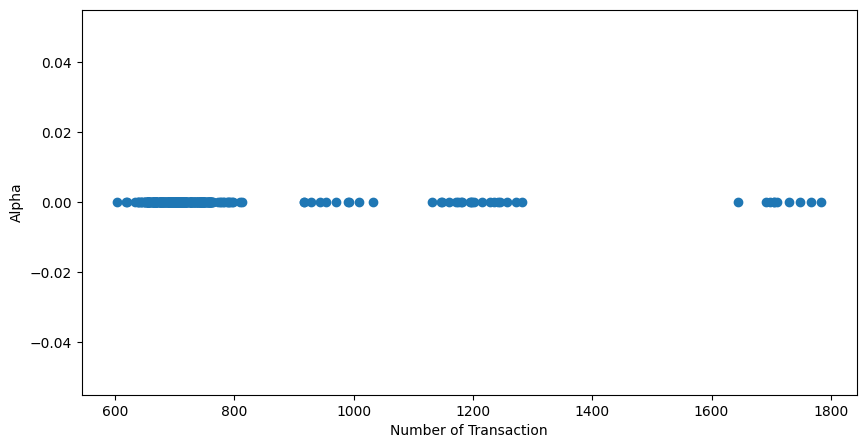

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.xlabel('Number of Transaction')
plt.ylabel('Alpha')
plt.scatter(number_of_transaction,alpha_star)
plt.savefig("alpha.pdf")

In [41]:
bata1 = [row[0] for row in beta_star]
bata2 = [row[1] for row in beta_star]

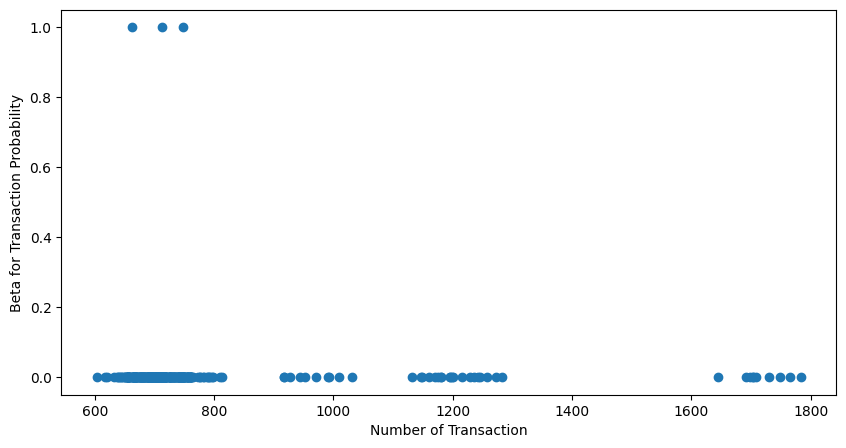

In [42]:
plt.figure(figsize=(10,5))
plt.xlabel('Number of Transaction')
plt.ylabel('Beta for Transaction Probability')
plt.scatter(number_of_transaction,bata1)
plt.savefig("beta1.pdf")

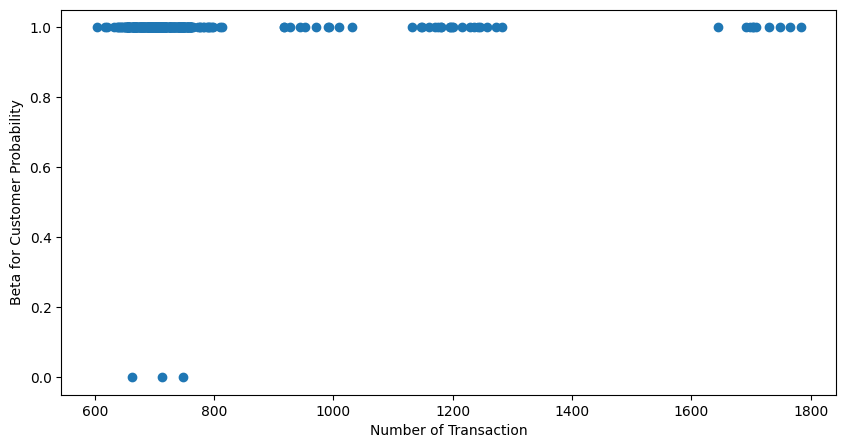

In [43]:
plt.figure(figsize=(10,5))
plt.xlabel('Number of Transaction')
plt.ylabel('Beta for Customer Probability')
plt.scatter(number_of_transaction,bata2)
plt.savefig("beta2.pdf")

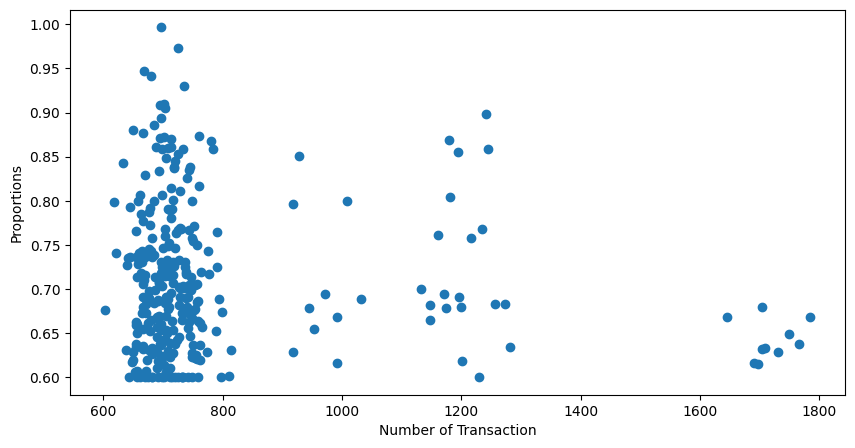

In [44]:
plt.figure(figsize=(10,5))
plt.xlabel('Number of Transaction')
plt.ylabel('Proportions')
plt.scatter(number_of_transaction,difference_daily)
plt.savefig("proportions_R.pdf")

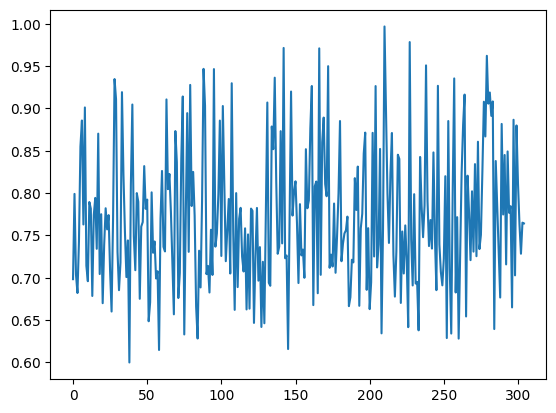

In [48]:
plt.plot(difference_daily)

## Additional Question - 11. success rate

In [46]:
import operator
import itertools

In [54]:
# # test with alpha = 0, beta1 = 0, beta2 = 1
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# alpha_star = list()
# beta_star = list()
# difference_daily = list()
# date_list_test = date_list
# # date_list_test = "2024-05-17"
# number_of_transaction = list()
# C4_cont = np.array([0]*5)
# C4_cont_optimal = np.array([0]*5)
# X_list = list()
# X4_list = list()
# Z_list = list()
# Z4_list = list()
# for date in date_list_test:
#     print(date)
#     print("------------------------------------------------------------------------------------------------------------------------------------------")
#     TransactionsInput_clean_test = TransactionsInput_clean.loc[TransactionsInput_clean['date'] == date]
#     # difference_min = float("inf")
#     difference_min = 0
#     difference = list()
    
    
#     cost_optimal, C4_cont_optimal = optimal_model(TransactionsInput_clean_test, C4_cont_optimal, Investigarion_team)

#     X ,X4 ,Z ,Z4, cost, C4_cont = daily_moel(0, 0, 1, TransactionsInput_clean_test, C4_cont, Investigarion_team)

#     # store the data for analyzing the success rate for each pirority
#     X_list.append(X_star)
#     X4_list.append(X4_star)
#     Z_list.append(Z_star)
#     Z4_list.append(Z4_star)
    
#     number_of_transaction.append(len(TransactionsInput_clean_test))

2023-10-01
------------------------------------------------------------------------------------------------------------------------------------------
FICO Xpress v9.2.2, Hyper, solve started 14:22:28, Nov 26, 2023
Heap usage: 20MB (peak 20MB, 9783KB system)
Minimizing MILP transaction_daily using up to 20 threads and up to 15GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
     42615 rows        34090 cols        85220 elements     34090 entities
Presolved problem has:
         0 rows            0 cols            0 elements         0 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 21MB (peak 44MB, 9783KB system)
Will try to keep branch and bound tree memory usage below 10.9GB
Starting concurrent solve with dual (1 thread)

 Concurrent-Solve,   0s
            Dual        
    objective   dual inf
 D  4954.1500   .0000000
------- optimal --------
Concurrent statistics:
      Dual: 0 simplex iterations, 0.00s
Optimal solution found
 


In [47]:
investigate = list(map(operator.add, map(operator.add, map(operator.add, X_list, X4_list), Z_list), Z4_list))
investigate_trans = [[list(row) for row in zip(*two_dim)] for two_dim in investigate]
if_investigate = [[sum(row) for row in two_dim] for two_dim in investigate_trans]
count_ones = if_investigate[1].count(1)
if_investigate_one = list(itertools.chain(*if_investigate))
TransactionsInput_clean_verify = TransactionsInput_clean[:238157][["priority","is_fraud"]]
TransactionsInput_clean_verify["if_investigate"] = if_investigate_one
accuracy_per_priority = TransactionsInput_clean_verify.groupby('priority').apply(
    lambda x: (x['is_fraud'] == x['if_investigate']).sum() / len(x)
).to_dict()

print(accuracy_per_priority)

{1: 0.9712039274345108, 2: 0.9636933740407624, 3: 0.8450305495332462, 4: 0.9620542082738944}


In [55]:
TransactionsInput_international_verify = TransactionsInput_clean[:238157][["bank_to","is_fraud"]]
TransactionsInput_international_verify["if_investigate"] = if_investigate_one
TransactionsInput_international_verify['if_internet'] = TransactionsInput_international_verify['bank_to'].apply(lambda x: 1 if x == 'Intrnl' else 0)
TransactionsInput_international_verify = TransactionsInput_international_verify.drop('bank_to', axis=1)
accuracy_per_internet = TransactionsInput_international_verify.groupby('if_internet').apply(
    lambda x: (x['is_fraud'] == x['if_investigate']).sum() / len(x)
).to_dict()

print(accuracy_per_internet)

{0: 0.939230336765217, 1: 0.9735717061795569}


# Sensitive Analysis

In [50]:
hire_cost = np.random.normal(90, 5)
hire_cost

98.59802864892933

In [87]:
def daily_random_moel(alpha, beta_trans, beta_customer, TransactionsInput_clean_test, C4_cont,inve_team_size):
    # Create a problem called transaction
    prob = xp.problem(name='transaction_daily') 

    # declaration
    number_of_transactions = len(TransactionsInput_clean_test)
    # number_of_priorities = 4
    number_of_banks = 5
    transactions = range(number_of_transactions)
    # priorities = range(number_of_priorities)
    banks = range(number_of_banks)

    # prepare the data
    # decide which bank will join the investigation
    Bank_to = TransactionsInput_clean_test["bank_to"]
    Bank_from = TransactionsInput_clean_test["bank_from"]
    Bank_to_onehot = pd.get_dummies(Bank_to, dtype=int)
    Bank_to_onehot = Bank_to_onehot.drop('Intrnl', axis=1)
    Bank_from_onehot = pd.get_dummies(Bank_from, dtype=int)
    array_1 = np.add(Bank_to_onehot, Bank_from_onehot)
    array_2 = np.add(Bank_to_onehot, Bank_from_onehot)

    # find p4 row
    p4 = TransactionsInput_clean_test[TransactionsInput_clean_test["priority"] == 4].index
    array_1.loc[p4] = 0
    trans_array_1 = array_1.T
    # trans_array_1 = np.array(trans_array_1)
    trans_array_1 = np.nan_to_num(trans_array_1)

    # find not p4 row
    not_p4 = TransactionsInput_clean_test.index.difference(p4)
    array_2.loc[not_p4] = 0
    trans_array_2 = array_2.T
    # trans_array_2 = np.array(trans_array_2)
    trans_array_2 = np.nan_to_num(trans_array_2)

    # investigation time and hire cose
    Investigation_time = np.array(TransactionsInput_clean_test["investigation_time"])
    # Investigation_hire = np.random.normal(90, 5, len(TransactionsInput_clean_test))
    Investigation_hire = np.array(TransactionsInput_clean_test["investigation_hire"])


    # value
    value =np.array(TransactionsInput_clean_test["Amount"])

    # prbability
    TP = np.array(TransactionsInput_clean_test["transac_prob"])
    TP = np.nan_to_num(TP)
    CP = np.array(TransactionsInput_clean_test["customer_prob"])
    CP = np.nan_to_num(CP)

    # add variables
    X = np.array([xp.var(vartype=xp.binary, name='X_{0}_{1}'.format(b+1, i+1)) 
                    for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    X4 = np.array([xp.var(vartype=xp.binary, name='X4_{0}_{1}'.format(b+1, i+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z = np.array([xp.var(vartype=xp.binary, name='Z_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    Z4 = np.array([xp.var(vartype=xp.binary, name='Z4_{0}_{1}'.format(i+1, b+1)) 
                        for b in banks for i in transactions], dtype=xp.npvar).reshape(number_of_banks, number_of_transactions)
    C = np.array([xp.var(vartype=xp.integer, name='C_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )
    C4 = np.array([xp.var(vartype=xp.integer, name='C4_{0}'.format(b+1))
                        for b in banks], dtype=xp.npvar).reshape(number_of_banks, )

    prob.addVariable(X, X4, Z, Z4, C, C4)

    # set constraints
    prob.addConstraint(X[b,i] + X4[b,i] + Z[b,i] + Z4[b,i] <= 1 for i in transactions for b in banks)

    prob.addConstraint(xp.Sum(X[b,i] * Investigation_time[i] for i in transactions) <= C[b] for b in banks)
    prob.addConstraint(xp.Sum(X4[b,i] * Investigation_time[i] for i in transactions ) <= C4[b] for b in banks)

    cont1 = [(C[n] + C4[n] + C4_cont[n]) <= inve_team_size[n] for n in banks]
    prob.addConstraint(cont1)
    # prob.addConstraint((C[n] + C4[n] + C4_cont[n]) <= inve_team_size[n] for n in banks)

    prob.addConstraint(X[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z[b,i] <= trans_array_1[b,i] for i in transactions for b in banks)
    prob.addConstraint(X4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)
    prob.addConstraint(Z4[b,i] <= trans_array_2[b,i] for i in transactions for b in banks)

    prob.addConstraint(xp.Sum(Z[n] + Z4[n] for n in banks) <= alpha)

    # set objective function
    prob.setObjective(xp.Sum(value[i]*(beta_trans*TP[i] + beta_customer*CP[i])*(1 - Z[n, i] - X[n, i] - Z4[n, i] - X4[n, i])
                  + (Z4[n, i] + Z[n, i])*Investigation_hire[i] for i in transactions for n in banks),
                    sense=xp.minimize)

    # get solution
    prob.optimize()

    x_optimal = prob.getSolution(X)
    x_4_optimal = prob.getSolution(X4)
    Ex_hire_optimal = prob.getSolution(Z)
    Ex_hire_4_optimal = prob.getSolution(Z4)
    C4_cont = prob.getSolution(C4)

    cost = prob.getObjVal()

    
    # print("Sensitivity Analysis of right-hand sides:")
    # rhslower = []; rhsupper = []
    # prob.rhssa(cont1, rhslower, rhsupper)
    # lower = list()
    # upper = list()
    # lower.append(rhslower)
    # upper.append(rhsupper)

    # for i,c in enumerate(cont1):
    #     print("The right-hand side of constraint {} can be varied between [{}, {}]".format(c, rhslower[i], rhsupper[i]))

    # Sensitivity analysis

    # Store original inve_team_size
    original_inve_team_size = inve_team_size.copy()
    inve_team_size_upper = inve_team_size.copy()
    inve_team_size_lower = inve_team_size.copy()
    

    # Store original results
    prob.optimize()
    original_obj_val = prob.getObjVal()
    # original_solutions = prob.getSolution(X), prob.getSolution(X4), prob.getSolution(Z), prob.getSolution(Z4), prob.getSolution(C4)

    lower = []
    upper = []
    delta = 1  # or any small value you consider appropriate
    for n in banks:
        # Increase RHS by delta
        inve_team_size_upper[n] += delta
        inve_team_size_lower[n] -= delta
        
        # Update the constraint (remove the old one and add a new one)
        prob.delConstraint(cont1)
        cont1 = [(C[n] + C4[n] + C4_cont[n]) <= inve_team_size_upper[n] for n in banks]
        prob.addConstraint(cont1)
        
        # Re-optimize
        prob.optimize()

        # Compare results
        new_obj_val = prob.getObjVal()
        # print(f'Bank {n}, Change in Objective: {new_obj_val - original_obj_val}')
        upper.append(new_obj_val - original_obj_val)

        # Update the constraint (remove the old one and add a new one)
        prob.delConstraint(cont1)
        cont1 = [(C[n] + C4[n] + C4_cont[n]) <= inve_team_size_lower[n] for n in banks]
        prob.addConstraint(cont1)
        
        # Re-optimize
        prob.optimize()

        # Compare results
        new_obj_val = prob.getObjVal()
        # print(f'Bank {n}, Change in Objective: {new_obj_val - original_obj_val}')
        lower.append(new_obj_val - original_obj_val)

        # Reset to original value for next iteration
        # inve_team_size[n] = original_inve_team_size[n]
    
    return lower, upper
    # return 


In [70]:
TransactionsInput_clean

transaction_id                             description   Amount  \
0                    2  Online Retailer - Electronics Purchase   199.99   
1                    3    Utilities Payment - Internet Service    60.00   
2                    4                            Rent Payment  1500.00   
3                    6  Online Retailer - Electronics Purchase   299.99   
4                    7          Asos - Online Fashion Shopping    55.00   
...                ...                                     ...      ...   
238152          315177   Home Improvement Store - DIY Supplies    75.40   
238153          315178     Grocery Shopping - Super Value Mart    55.25   
238154          315179             JCPenney - Discount Fashion    40.00   
238155          315180             Gas Station - Fuel Purchase    40.45   
238156          315182             Gas Station - Fuel Purchase    40.45   

                category       date    month  customer_id      type In_or_Out  \
0        Online Shopping 2023-10-01  October        10298  spending  paid_out   
1              Utilities 2023-10-01  October        10298  spending  paid_out   
2                Housing 2023-10-01  October        14507  spending  paid_out   
3        Online Shopping 2023-10-01  October        14507  spending  paid_out   
4               Shopping 2023-10-01  October        14507  spending  paid_out   
...                  ...        ...      ...          ...       ...       ...   
238152  Home Improvement 2024-07-31     July        11908  spending  paid_out   
238153         Groceries 2024-07-31     July        15026  spending  paid_out   
238154          Shopping 2024-07-31     July        11908  spending  paid_out   
238155    Transportation 2024-07-31     July        10291  spending  paid_out   
238156    Transportation 2024-07-31     July        13560  spending  paid_out   

       bank_to bank_from  transac_prob  description_prob  priority  if_fraud  \
0       bank_A    bank_E          0.78              0.25         3         0   
1       bank_C    bank_E          0.30              0.22         1         0   
2       bank_D    bank_E          0.57              0.53         3         0   
3       bank_E    bank_E          0.75              0.65         3         0   
4       bank_B    bank_E          0.37              0.31         1         0   
...        ...       ...           ...               ...       ...       ...   
238152  bank_D    bank_A          0.35              0.63         1         0   
238153  bank_C    bank_B          0.42              0.17         1         0   
238154  bank_D    bank_A          0.36              0.36         1         0   
238155  bank_D    bank_D          0.28              0.64         1         0   
238156  bank_A    bank_D          0.16              0.54         1         0   

        is_fraud home_bank  customer_prob  investigation_time  \
0              0    bank_E           0.49                1.00   
1              0    bank_E           0.49                0.25   
2              0    bank_E           0.35                1.00   
3              0    bank_E           0.35                1.00   
4              0    bank_E           0.35                0.25   
...          ...       ...            ...                 ...   
238152         0    bank_A           0.32                0.25   
238153         0    bank_B           0.52                0.25   
238154         0    bank_A           0.32                0.25   
238155         0    bank_D           0.35                0.25   
238156         0    bank_D           0.20                0.25   

        investigation_hire  
0                      100  
1                       40  
2                      100  
3                      100  
4                       40  
...                    ...  
238152                  40  
238153                  40  
238154                  40  
238155                  40  
238156                  40  

[238157 rows x 20 columns]

In [58]:
investigate = list(map(operator.add, map(operator.add, map(operator.add, X_list, X4_list), Z_list), Z4_list))
investigate_trans = [[list(row) for row in zip(*two_dim)] for two_dim in investigate]
if_investigate = [[sum(row) for row in two_dim] for two_dim in investigate_trans]
count_ones = if_investigate[1].count(1)
if_investigate_one = list(itertools.chain(*if_investigate))
TransactionsInput_clean_verify = TransactionsInput_clean[:238157][["priority","is_fraud"]]
TransactionsInput_clean_verify["if_investigate"] = if_investigate_one
accuracy_per_priority = TransactionsInput_clean_verify.groupby('priority').apply(
    lambda x: (x['is_fraud'] == x['if_investigate']).sum() / len(x)
).to_dict()

print(accuracy_per_priority)

{1: 0.9713036474513865, 2: 0.9643947520422477, 3: 0.8506925158122951, 4: 0.9611982881597717}


In [97]:
# alpha_star = list()
# cost_daily = list()
date_list_test = date_list[:10]
number_of_transaction = list()
C4_cont = np.array([0]*5)
upper_list = list()
lower_list = list()
for date in date_list_test:
    TransactionsInput_clean_test = TransactionsInput_clean.loc[TransactionsInput['date'] == date]
    print(date)
    # cost_min = float(0)
    # cost = list()
    lower, upper = daily_random_moel(0, 0, 1, TransactionsInput_clean_test,C4_cont,Investigarion_team)
    print("------------------------------------------------------------------")
    print(lower)

    number_of_transaction.append(len(TransactionsInput_clean_test))
    upper_list.append(upper)
    lower_list.append(lower)

2023-10-01
FICO Xpress v9.2.2, Hyper, solve started 1:32:50, Nov 27, 2023
Heap usage: 31MB (peak 31MB, 108MB system)
Minimizing MILP transaction_daily using up to 20 threads and up to 15GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
     62805 rows        48310 cols       144920 elements     48310 entities
Presolved problem has:
         5 rows          327 cols          327 elements       327 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 35MB (peak 70MB, 108MB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 2.50e-01,  2.00e+00] / [ 1.25e-01,  1.00e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  1.20e+01] / [ 1.00e+00,  6.00e+00]
  Objective      [min,max] : [ 4.25e-02,  1.35e+03] / [ 2.97e+01,  1.35e+03]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 10.9GB
Fixed 248 (of 248) columns in 4 (of 4) subproblems

 **

In [71]:
Bank_to = TransactionsInput_clean_test["bank_to"]
# Bank_from = TransactionsInput_clean_test["bank_from"]
Bank_to_onehot = pd.get_dummies(Bank_to, dtype=int)

In [93]:
upper

[-268.0,
 -485.4701000000059,
 -710.4701000000059,
 -970.4701000000059,
 -1222.470100000006]

In [94]:
lower

[273.195000000007, 488.195000000007, 722.695000000007, 984.2163, 1236.2163]